In [2]:
import numpy as np 
import pandas as pd
import pickle, glob
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

def to_datetime(date):
    timestamp = ((date - np.datetime64('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)

In [3]:
year = 2023
place = 'Keelung'

stages= 4 if year == 2023 else 3
path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_{stages}stage_separation/')[0]
df = pd.read_pickle(glob.glob(f"{path}/*/{place}_{year}_diurnal_variations_nostd_{year}??_S0.pkl")[0])  

days, hr = df['level'].shape

dtime = pd.read_csv(f"{path}/result_nostd/{place}_{year}_index_variations.csv")
dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
t1 = dtime.values[0]; t2 = dtime.values[-1]

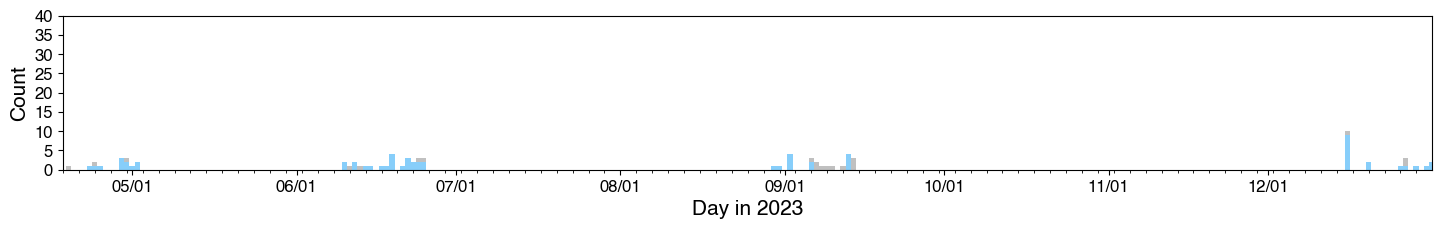

In [17]:
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize=(days/15, 2))

x_time = []; y_count_in_day = []; y_count_day=[]; y_count_night=[]
for ii in range(df['level'].shape[0]):
    begintime = to_datetime(t1)+timedelta(days=ii)
    df_ = df['level'][ii,:]
    count_in_day = np.sum(df_>= 0.1)
    
    df_day = df['level'][ii, 60:216]
    count_day = np.sum(df_day>= 0.1)
    
    df_night = df['level'][ii, 0:60]
    df_night_ = df['level'][ii, 216:288]
    count_night = np.sum(df_night>= 0.1)+np.sum(df_night_>= 0.1)
    
    x_time.append(begintime)
    y_count_in_day.append(count_in_day)
    y_count_day.append(count_day)
    y_count_night.append(count_night)
    
# plt.bar(x_time,y_count_in_day)
count={'day':y_count_day, 'night':y_count_night}
bottom = np.zeros(days)
colors = ['lightskyblue', 'silver']
for i, (label, noise_count) in enumerate(count.items()):
    p = plt.bar(x_time, noise_count, width=1, bottom=bottom, linewidth= 0.5, color=colors[i])
    bottom += noise_count

plt.xlim(to_datetime(t1), to_datetime(t2))
if year == 2023 and place=='Taoyuan':
    ax.yaxis.set_major_locator(MultipleLocator(25))
    plt.hlines(y=25, xmin=to_datetime(t1), xmax=to_datetime(t2), color='lightgrey', lw=1, ls='--')
else:
    ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'Day in {year}', fontsize=15)
ax.set_ylabel(f'Count', fontsize=15)
if place == 'Taoyuan':
    ax.set_ylim(0,25)
else:
    ax.set_ylim(0,40)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


# plt.savefig(f'{path}/{place}_{year}_count_noise.png', dpi=200)
# plt.savefig(f'{path}/{place}_{year}_count_noise.pdf', dpi=200)

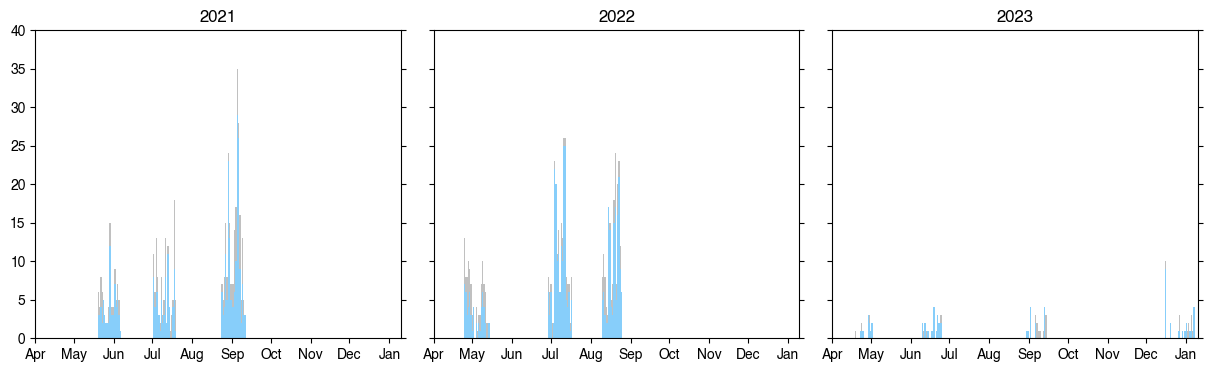

In [18]:
# plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.subplots_adjust(wspace = 0.09) 
place = 'Keelung'

for year in [2021, 2022, 2023]:
    stages= 4 if year == 2023 else 3
    if year == 2021:
        pidx=0
        
    elif year == 2022:
        pidx=1
    elif year == 2023:
        pidx=2
    ax[pidx].set_title(f'{year}',fontsize=12)
    path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_{stages}stage_separation/')[0]
    df = pd.read_pickle(glob.glob(f"{path}/*/{place}_{year}_diurnal_variations_nostd_{year}??_S0.pkl")[0])  

    days, hr = df['level'].shape

    dtime = pd.read_csv(f"{path}/result_nostd/{place}_{year}_index_variations.csv")
    dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
    t1 = dtime.values[0]; t2 = dtime.values[-1]
    
    x_time = []; y_count_in_day = []; y_count_day=[]; y_count_night=[]
    for ii in range(df['level'].shape[0]):
        begintime = to_datetime(t1)+timedelta(days=ii)
        df_ = df['level'][ii,:]
        count_in_day = np.sum(df_>= 0.1)

        df_day = df['level'][ii, 60:216]
        count_day = np.sum(df_day>= 0.1)

        df_night = df['level'][ii, 0:60]
        df_night_ = df['level'][ii, 216:288]
        count_night = np.sum(df_night>= 0.1)+np.sum(df_night_>= 0.1)

        x_time.append(begintime)
        y_count_in_day.append(count_in_day)
        y_count_day.append(count_day)
        y_count_night.append(count_night)

    # plt.bar(x_time,y_count_in_day)
    count={'day':y_count_day, 'night':y_count_night}
    bottom = np.zeros(days)
    colors = ['lightskyblue', 'silver']
    for i, (label, noise_count) in enumerate(count.items()):
        p = ax[pidx].bar(x_time, noise_count, width=1, bottom=bottom, linewidth= 0.5, color=colors[i])
        bottom += noise_count

    # ax[pidx].set_xlim(to_datetime(t1), to_datetime(t2))

ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# ax[0].xaxis.set_minor_locator(mdates.DayLocator(interval=15))
# ax[1].xaxis.set_minor_locator(mdates.DayLocator(interval=15))
# ax[2].xaxis.set_minor_locator(mdates.DayLocator(interval=15))

ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax[0].set_ylim(0, 40)
ax[1].set_ylim(0, 40)
ax[2].set_ylim(0, 40)

ax[0].set_xlim(datetime(2021, 4, 1) ,datetime(2022, 1, 10))
ax[1].set_xlim(datetime(2022, 4, 1) ,datetime(2023, 1, 10))
ax[2].set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 10))

ax[0].yaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')
ax[2].yaxis.set_ticks_position('both')

qqq = '/Users/tong/Documents/09_IONTU/Results/soundsepration/Finalresults'
# plt.savefig(f'{qqq}/{place}_3years_count_noise_all.png', dpi=200)
# plt.savefig(f'{qqq}/{place}_3years_count_noise_all.pdf', dpi=200)

(19448.0, 19732.0)

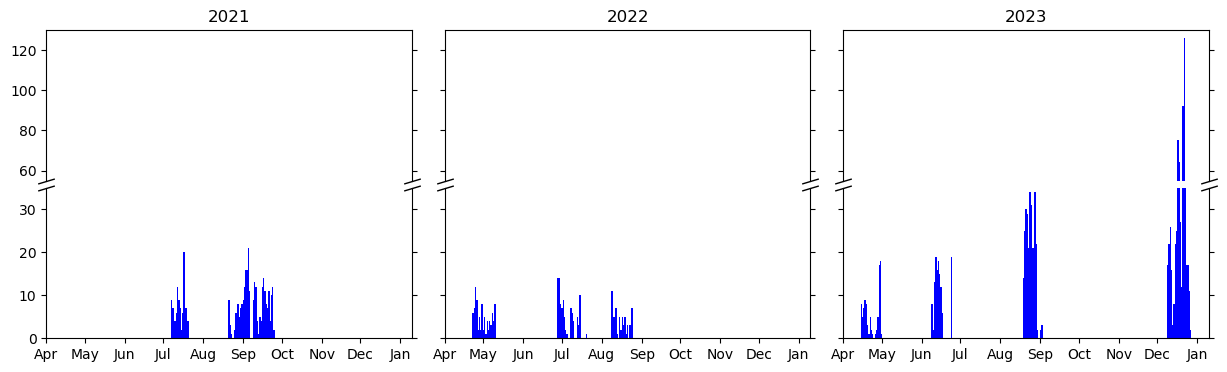

In [4]:
# plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(2, 3, figsize=(15, 4))
plt.subplots_adjust(wspace = 0.09,hspace=0.05) 
place = 'Taoyuan'

for year in [2021, 2022, 2023]:
    stages= 4 if year == 2023 else 3
    if year == 2021:
        pidx=0
    elif year == 2022:
        pidx=1
    elif year == 2023:
        pidx=2
    ax[0,pidx].set_title(f'{year}',fontsize=12)
    path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_{stages}stage_separation/')[0]
    df = pd.read_pickle(glob.glob(f"{path}/*/{place}_{year}_diurnal_variations_nostd_{year}??_S0.pkl")[0])  

    days, hr = df['level'].shape

    dtime = pd.read_csv(f"{path}/result_nostd/{place}_{year}_index_variations.csv")
    dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
    t1 = dtime.values[0]; t2 = dtime.values[-1]
    
    x_time = []; y_count_in_day = []; y_count_day=[]; y_count_night=[]
    y_avg_in_day = []
    for ii in range(df['level'].shape[0]):
        begintime = to_datetime(t1)+timedelta(days=ii)
        df_ = df['level'][ii,:]
        count_in_day = np.sum(df_>= 0.1)

        df_day = df['level'][ii, 60:216]
        count_day = np.sum(df_day>= 0.1)

        df_night = df['level'][ii, 0:60]
        df_night_ = df['level'][ii, 216:288]
        count_night = np.sum(df_night>= 0.1)+np.sum(df_night_>= 0.1)

        x_time.append(begintime)
        y_count_in_day.append(count_in_day)
        y_count_day.append(count_day)
        y_count_night.append(count_night)
    
    # plt.bar(x_time,y_count_in_day)
        
    p = ax[0, pidx].bar(x_time, y_count_in_day, width=1, linewidth= 0.5, color='blue')
    p = ax[1, pidx].bar(x_time, y_count_in_day, width=1, linewidth= 0.5, color='blue')
    
    #===================================================
    # count={'day':y_count_day, 'night':y_count_night}
    # bottom = np.zeros(days)
    # colors = ['blue', 'silver']
    # for i, (label, noise_count) in enumerate(count.items()):
    #     p = ax[0,pidx].bar(x_time, noise_count, width=1, bottom=bottom, linewidth= 0.5, color=colors[i])
    #     p = ax[1,pidx].bar(x_time, noise_count, width=1, bottom=bottom, linewidth= 0.5, color=colors[i])
    #     bottom += noise_count
    #===================================================
    
    ax[0, pidx].set_xlim(to_datetime(t1), to_datetime(t2))
    ax[1, pidx].set_xlim(to_datetime(t1), to_datetime(t2))

for idx in [0, 1, 2]:
    ax[1,idx].set_ylim(0, 35)  # outliers only
    ax[0,idx].set_ylim(55, 130)  # most of the data

    ax[0,idx].spines.bottom.set_visible(False)
    ax[1,idx].spines.top.set_visible(False)
    ax[0,idx].xaxis.tick_top()
    ax[0,idx].tick_params(labeltop=False)  # don't put tick labels at the top
    ax[1,idx].xaxis.tick_bottom()

    d = .3  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax[0,idx].plot([0, 1], [0, 0], transform=ax[0,idx].transAxes, **kwargs)
    ax[1,idx].plot([0, 1], [1, 1], transform=ax[1,idx].transAxes, **kwargs)

    ax[0,idx].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1,idx].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1,idx].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[0,idx].xaxis.set_ticks_position('none')
    ax[0,idx].yaxis.set_ticks_position('both')
    ax[1,idx].yaxis.set_ticks_position('both')
    if idx > 0:
        ax[0,idx].set_yticklabels([])
        ax[1,idx].set_yticklabels([])
        
ax[0, 0].set_xlim(datetime(2021, 4, 1) ,datetime(2022, 1, 10))
ax[1, 0].set_xlim(datetime(2021, 4, 1) ,datetime(2022, 1, 10))

ax[0, 1].set_xlim(datetime(2022, 4, 1) ,datetime(2023, 1, 10))
ax[1, 1].set_xlim(datetime(2022, 4, 1) ,datetime(2023, 1, 10))

ax[0, 2].set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 10))
ax[1, 2].set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 10))

# qqq = '/Users/tong/Documents/09_IONTU/Results/soundsepration/Finalresults'
# plt.savefig(f'{qqq}/{place}_3years_count_noise_all.png', dpi=200, bbox_inches='tight')
# plt.savefig(f'{qqq}/{place}_3years_count_noise_all.pdf', dpi=200, bbox_inches='tight')

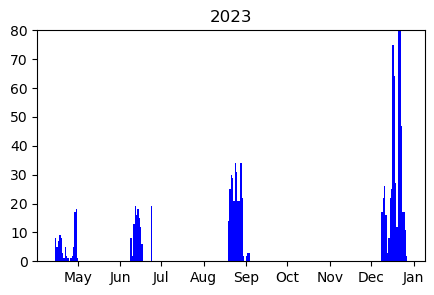

In [23]:
fig, ax = plt.subplots(1, figsize=(5, 3))
plt.subplots_adjust(wspace = 0.09, hspace=0.05) 
place = 'Taoyuan'

for year in [2023]:
    stages= 4 if year == 2023 else 3
    ax.set_title(f'{year}',fontsize=12)
    path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_{stages}stage_separation/')[0]
    df = pd.read_pickle(glob.glob(f"{path}/*/{place}_{year}_diurnal_variations_nostd_{year}??_S0.pkl")[0])  

    days, hr = df['level'].shape

    dtime = pd.read_csv(f"{path}/result_nostd/{place}_{year}_index_variations.csv")
    dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
    t1 = dtime.values[0]; t2 = dtime.values[-1]
    
    x_time = []; y_count_in_day = []; y_count_day=[]; y_count_night=[]
    y_avg_in_day = []
    for ii in range(df['level'].shape[0]):
        begintime = to_datetime(t1)+timedelta(days=ii)
        df_ = df['level'][ii,:]
        count_in_day = np.sum(df_>= 0.1)

        x_time.append(begintime)
        y_count_in_day.append(count_in_day)
p = ax.bar(x_time, y_count_in_day, width=1, linewidth= 0.5, color='blue')
ax.set_ylim(0, 80)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

plt.savefig('/Users/tong/Dropbox/海保署報告/Figure/Taoyuan_CountNoise_2023,png', dpi=200)

In [6]:
x_time

[datetime.datetime(2023, 4, 14, 23, 0),
 datetime.datetime(2023, 4, 15, 23, 0),
 datetime.datetime(2023, 4, 16, 23, 0),
 datetime.datetime(2023, 4, 17, 23, 0),
 datetime.datetime(2023, 4, 18, 23, 0),
 datetime.datetime(2023, 4, 19, 23, 0),
 datetime.datetime(2023, 4, 20, 23, 0),
 datetime.datetime(2023, 4, 21, 23, 0),
 datetime.datetime(2023, 4, 22, 23, 0),
 datetime.datetime(2023, 4, 23, 23, 0),
 datetime.datetime(2023, 4, 24, 23, 0),
 datetime.datetime(2023, 4, 25, 23, 0),
 datetime.datetime(2023, 4, 26, 23, 0),
 datetime.datetime(2023, 4, 27, 23, 0),
 datetime.datetime(2023, 4, 28, 23, 0),
 datetime.datetime(2023, 4, 29, 23, 0),
 datetime.datetime(2023, 4, 30, 23, 0),
 datetime.datetime(2023, 5, 1, 23, 0),
 datetime.datetime(2023, 5, 2, 23, 0),
 datetime.datetime(2023, 5, 3, 23, 0),
 datetime.datetime(2023, 5, 4, 23, 0),
 datetime.datetime(2023, 5, 5, 23, 0),
 datetime.datetime(2023, 5, 6, 23, 0),
 datetime.datetime(2023, 5, 7, 23, 0),
 datetime.datetime(2023, 5, 8, 23, 0),
 datetim